In [7]:
from parrot import py_predictor
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
sanborn_sublib_d = pd.read_excel("../data/elife-68068-fig1-data1-v3.xlsx", sheet_name = "53 aa mutants, see Fig 2,4,7")
sanborn_sublib_e = pd.read_excel("../data/elife-68068-fig1-data1-v3.xlsx", sheet_name = "cAD muts and 9mers, see Fig 3,4")
sanborn_sublib_f = pd.read_excel("../data/elife-68068-fig1-data1-v3.xlsx", sheet_name = "Nuclear proteins, see Fig 7")
all_sanborn = pd.concat([sanborn_sublib_d, sanborn_sublib_e, sanborn_sublib_f])
all_sanborn

,Unnamed: 0,protein sequence,protein,protein ID,position,activation,Z score,group,num cells,"num cells, bin 1",...,"num cells, bin 3","num cells, bin 4","num cells, bin 5","num cells, bin 6","num cells, bin 7","num cells, bin 8",GFP average,GFP std,nuclear confident,disorder fraction
0,D_ADbest-AA-muts_P07248_415_DE,SENQPEFVEFQELLENETLGNELLETTAVLKEFELLHEESVSATAT...,ADR1,P07248,415.0,16.930617,4.545554,ADbest-AA-muts,39.106510,0.000000,...,0.000000,4.211373,21.399212,13.495925,0.000000,0.000000,188.367987,1.952014,NaN,NaN
1,D_ADbest-AA-muts_P07248_415_ED,SDNQPDFVDFQDLLDNDTLGNDLLDTTAVLKDFDLLHDDSVSATAT...,ADR1,P07248,415.0,57.468119,6.509113,ADbest-AA-muts,138.026904,0.000000,...,0.000000,2.105686,5.604555,60.249667,56.480461,13.586534,639.383311,2.009468,NaN,NaN
2,D_ADbest-AA-muts_P07248_648_DE,LPHFPIIHPSLLELELESLQRYTNEEGYEEAENAQLFERLSQGTEK...,ADR1,P07248,648.0,8.771608,3.488982,ADbest-AA-muts,53.525191,0.000000,...,0.829402,17.371912,33.627333,0.963995,0.000000,0.000000,97.591841,1.969207,NaN,NaN
3,D_ADbest-AA-muts_P07248_648_ED,LPHFPIIHPSLLDLDLDSLQRYTNDDGYDDADNAQLFDRLSQGTDK...,ADR1,P07248,648.0,18.596741,4.696363,ADbest-AA-muts,163.682464,0.000000,...,4.147011,14.213383,67.254665,73.263595,3.704986,0.000000,206.905080,2.367087,NaN,NaN
4,D_ADbest-AA-muts_P07269_0_DE,MMEEFSYEHEFNTHFATELEYLQHEQQQQQQQQHEQQHNQQQQPQP...,PHO2,P07269,0.0,9.113962,3.550498,ADbest-AA-muts,57.209762,0.000000,...,1.658804,16.319069,39.231888,0.000000,0.000000,0.000000,101.400833,1.816528,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2066,D_nuc-nonhits_Q03656_575,LLGAPWGCGADIWSTACLIFELITGDFLFEPDEGHSYTKDDDHIAQ...,SKY1,Q03656,575.0,0.882813,-0.200263,nuc-nonhits,373.273630,15.279192,...,170.027455,2.632108,0.000000,0.000000,0.000000,0.000000,9.822066,1.698867,False,0.052411
2067,D_nuc-nonhits_P17883_860,QVLRLFIWIESKVDTLPVESLVSIFENSQFSGSEEIDSVDNIKIDT...,SKI3,P17883,860.0,0.872411,-0.219305,nuc-nonhits,123.591920,10.744025,...,63.034569,0.000000,0.000000,0.000000,0.000000,0.000000,9.706344,1.807475,False,0.106918
2068,D_nuc-nonhits_P53036_375,QRDPVYLGHLLYELTMHMEDFYALLIKLENDDDDDHDTASKALPSV...,SAP4,P53036,375.0,0.870095,-0.223576,nuc-nonhits,198.278393,6.640780,...,69.669787,8.422745,0.000000,0.000000,0.000000,0.000000,9.680576,1.792224,False,0.270440
2069,D_nuc-nonhits_P22211_487,EYCIGTTLNHPNIIETIEIVYENDRILQVMEYCEYDLFAIVMSNKM...,NPR1,P22211,487.0,0.836971,-0.285937,nuc-nonhits,144.753817,12.741658,...,67.181580,0.000000,0.000000,0.000000,0.000000,0.000000,9.312039,1.798080,False,0.012579


In [9]:
consensus_predictor = py_predictor.Predictor("../output/parrot_human_yeast_aggreg", 
                                                dtype="residues")


In [12]:
slow_parrot_predictor = py_predictor.Predictor("../output/harmonized_screens_parrot_slow", 
                                                dtype="sequence")
slow_parrot_predictor

In [69]:
parrot_paddle_predictor = py_predictor.Predictor("../models/paddleTrain_AD_network.pt", 
                                                dtype="sequence")
parrot_paddle_predictor

In [70]:
all_sanborn["parrot_paddle_pred"] = all_sanborn["protein sequence"].apply(lambda seq: parrot_paddle_predictor.predict(seq))
all_sanborn

,Unnamed: 0,protein sequence,protein,protein ID,position,activation,Z score,group,num cells,"num cells, bin 1",...,GFP average,GFP std,nuclear confident,disorder fraction,parrot_pred,parrot_consensus_pred,parrot_harmonized_data_pred,avg_parrot_consensus_pred,is_positive,parrot_paddle_pred
0,D_ADbest-AA-muts_P07248_415_DE,SENQPEFVEFQELLENETLGNELLETTAVLKEFELLHEESVSATAT...,ADR1,P07248,415.0,16.930617,4.545554,ADbest-AA-muts,39.106510,0.000000,...,188.367987,1.952014,NaN,NaN,"[0.6141116, 0.6377285, 0.59335536, 0.5836047, ...","[0.6141116, 0.6377285, 0.59335536, 0.5836047, ...",9.209839,0.589143,True,[9.325432]
1,D_ADbest-AA-muts_P07248_415_ED,SDNQPDFVDFQDLLDNDTLGNDLLDTTAVLKDFDLLHDDSVSATAT...,ADR1,P07248,415.0,57.468119,6.509113,ADbest-AA-muts,138.026904,0.000000,...,639.383311,2.009468,NaN,NaN,"[0.71410805, 0.75583106, 0.71530586, 0.7141337...","[0.71410805, 0.75583106, 0.71530586, 0.7141337...",22.822618,0.887520,True,[10.733619]
2,D_ADbest-AA-muts_P07248_648_DE,LPHFPIIHPSLLELELESLQRYTNEEGYEEAENAQLFERLSQGTEK...,ADR1,P07248,648.0,8.771608,3.488982,ADbest-AA-muts,53.525191,0.000000,...,97.591841,1.969207,NaN,NaN,"[0.29672343, 0.29356375, 0.2943753, 0.3332867,...","[0.29672343, 0.29356375, 0.2943753, 0.3332867,...",1.003897,0.265799,False,[3.8866198]
3,D_ADbest-AA-muts_P07248_648_ED,LPHFPIIHPSLLDLDLDSLQRYTNDDGYDDADNAQLFDRLSQGTDK...,ADR1,P07248,648.0,18.596741,4.696363,ADbest-AA-muts,163.682464,0.000000,...,206.905080,2.367087,NaN,NaN,"[0.48007566, 0.48881313, 0.4757893, 0.51956713...","[0.48007566, 0.48881313, 0.4757893, 0.51956713...",4.181293,0.590665,True,[9.391256]
4,D_ADbest-AA-muts_P07269_0_DE,MMEEFSYEHEFNTHFATELEYLQHEQQQQQQQQHEQQHNQQQQPQP...,PHO2,P07269,0.0,9.113962,3.550498,ADbest-AA-muts,57.209762,0.000000,...,101.400833,1.816528,NaN,NaN,"[0.4225715, 0.41646576, 0.45522875, 0.40836674...","[0.4225715, 0.41646576, 0.45522875, 0.40836674...",1.685246,0.233829,True,[7.3517003]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8659,D_nuc-nonhits_Q03656_575,LLGAPWGCGADIWSTACLIFELITGDFLFEPDEGHSYTKDDDHIAQ...,SKY1,Q03656,575.0,0.882813,-0.200263,nuc-nonhits,373.273630,15.279192,...,9.822066,1.698867,False,0.052411,"[0.5095609, 0.5375697, 0.5450611, 0.5736192, 0...","[0.5095609, 0.5375697, 0.5450611, 0.5736192, 0...",8.586390,0.552926,False,[-0.023046523]
8660,D_nuc-nonhits_P17883_860,QVLRLFIWIESKVDTLPVESLVSIFENSQFSGSEEIDSVDNIKIDT...,SKI3,P17883,860.0,0.872411,-0.219305,nuc-nonhits,123.591920,10.744025,...,9.706344,1.807475,False,0.106918,"[0.094473474, 0.15301678, 0.17952222, 0.223656...","[0.094473474, 0.15301678, 0.17952222, 0.223656...",0.336440,0.265413,False,[0.008075833]
8661,D_nuc-nonhits_P53036_375,QRDPVYLGHLLYELTMHMEDFYALLIKLENDDDDDHDTASKALPSV...,SAP4,P53036,375.0,0.870095,-0.223576,nuc-nonhits,198.278393,6.640780,...,9.680576,1.792224,False,0.270440,"[0.23453888, 0.28230852, 0.36139542, 0.2873225...","[0.23453888, 0.28230852, 0.36139542, 0.2873225...",0.918645,0.220039,False,[0.4838302]
8662,D_nuc-nonhits_P22211_487,EYCIGTTLNHPNIIETIEIVYENDRILQVMEYCEYDLFAIVMSNKM...,NPR1,P22211,487.0,0.836971,-0.285937,nuc-nonhits,144.753817,12.741658,...,9.312039,1.798080,False,0.012579,"[0.24207762, 0.26287946, 0.2720001, 0.28873622...","[0.24207762, 0.26287946, 0.2720001, 0.28873622...",3.103232,0.347352,False,[-0.03688401]


In [13]:
all_sanborn["parrot_consensus_pred"] = all_sanborn["protein sequence"].apply(lambda seq: consensus_predictor.predict(seq))
all_sanborn["parrot_harmonized_data_pred"] = all_sanborn["protein sequence"].apply(lambda seq: slow_parrot_predictor.predict(seq))
all_sanborn

,Unnamed: 0,protein sequence,protein,protein ID,position,activation,Z score,group,num cells,"num cells, bin 1",...,"num cells, bin 6","num cells, bin 7","num cells, bin 8",GFP average,GFP std,nuclear confident,disorder fraction,parrot_pred,parrot_consensus_pred,parrot_harmonized_data_pred
0,D_ADbest-AA-muts_P07248_415_DE,SENQPEFVEFQELLENETLGNELLETTAVLKEFELLHEESVSATAT...,ADR1,P07248,415.0,16.930617,4.545554,ADbest-AA-muts,39.106510,0.000000,...,13.495925,0.000000,0.000000,188.367987,1.952014,NaN,NaN,"[0.6141116, 0.6377285, 0.59335536, 0.5836047, ...","[0.6141116, 0.6377285, 0.59335536, 0.5836047, ...",[9.209839]
1,D_ADbest-AA-muts_P07248_415_ED,SDNQPDFVDFQDLLDNDTLGNDLLDTTAVLKDFDLLHDDSVSATAT...,ADR1,P07248,415.0,57.468119,6.509113,ADbest-AA-muts,138.026904,0.000000,...,60.249667,56.480461,13.586534,639.383311,2.009468,NaN,NaN,"[0.71410805, 0.75583106, 0.71530586, 0.7141337...","[0.71410805, 0.75583106, 0.71530586, 0.7141337...",[22.822618]
2,D_ADbest-AA-muts_P07248_648_DE,LPHFPIIHPSLLELELESLQRYTNEEGYEEAENAQLFERLSQGTEK...,ADR1,P07248,648.0,8.771608,3.488982,ADbest-AA-muts,53.525191,0.000000,...,0.963995,0.000000,0.000000,97.591841,1.969207,NaN,NaN,"[0.29672343, 0.29356375, 0.2943753, 0.3332867,...","[0.29672343, 0.29356375, 0.2943753, 0.3332867,...",[1.0038974]
3,D_ADbest-AA-muts_P07248_648_ED,LPHFPIIHPSLLDLDLDSLQRYTNDDGYDDADNAQLFDRLSQGTDK...,ADR1,P07248,648.0,18.596741,4.696363,ADbest-AA-muts,163.682464,0.000000,...,73.263595,3.704986,0.000000,206.905080,2.367087,NaN,NaN,"[0.48007566, 0.48881313, 0.4757893, 0.51956713...","[0.48007566, 0.48881313, 0.4757893, 0.51956713...",[4.1812925]
4,D_ADbest-AA-muts_P07269_0_DE,MMEEFSYEHEFNTHFATELEYLQHEQQQQQQQQHEQQHNQQQQPQP...,PHO2,P07269,0.0,9.113962,3.550498,ADbest-AA-muts,57.209762,0.000000,...,0.000000,0.000000,0.000000,101.400833,1.816528,NaN,NaN,"[0.4225715, 0.41646576, 0.45522875, 0.40836674...","[0.4225715, 0.41646576, 0.45522875, 0.40836674...",[1.6852461]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2066,D_nuc-nonhits_Q03656_575,LLGAPWGCGADIWSTACLIFELITGDFLFEPDEGHSYTKDDDHIAQ...,SKY1,Q03656,575.0,0.882813,-0.200263,nuc-nonhits,373.273630,15.279192,...,0.000000,0.000000,0.000000,9.822066,1.698867,False,0.052411,"[0.5095609, 0.5375697, 0.5450611, 0.5736192, 0...","[0.5095609, 0.5375697, 0.5450611, 0.5736192, 0...",[8.58639]
2067,D_nuc-nonhits_P17883_860,QVLRLFIWIESKVDTLPVESLVSIFENSQFSGSEEIDSVDNIKIDT...,SKI3,P17883,860.0,0.872411,-0.219305,nuc-nonhits,123.591920,10.744025,...,0.000000,0.000000,0.000000,9.706344,1.807475,False,0.106918,"[0.094473474, 0.15301678, 0.17952222, 0.223656...","[0.094473474, 0.15301678, 0.17952222, 0.223656...",[0.33643985]
2068,D_nuc-nonhits_P53036_375,QRDPVYLGHLLYELTMHMEDFYALLIKLENDDDDDHDTASKALPSV...,SAP4,P53036,375.0,0.870095,-0.223576,nuc-nonhits,198.278393,6.640780,...,0.000000,0.000000,0.000000,9.680576,1.792224,False,0.270440,"[0.23453888, 0.28230852, 0.36139542, 0.2873225...","[0.23453888, 0.28230852, 0.36139542, 0.2873225...",[0.91864526]
2069,D_nuc-nonhits_P22211_487,EYCIGTTLNHPNIIETIEIVYENDRILQVMEYCEYDLFAIVMSNKM...,NPR1,P22211,487.0,0.836971,-0.285937,nuc-nonhits,144.753817,12.741658,...,0.000000,0.000000,0.000000,9.312039,1.798080,False,0.012579,"[0.24207762, 0.26287946, 0.2720001, 0.28873622...","[0.24207762, 0.26287946, 0.2720001, 0.28873622...",[3.103232]


In [25]:
all_sanborn["avg_parrot_consensus_pred"] = all_sanborn["parrot_consensus_pred"].apply(lambda x: np.mean(x))
all_sanborn

,Unnamed: 0,protein sequence,protein,protein ID,position,activation,Z score,group,num cells,"num cells, bin 1",...,"num cells, bin 7","num cells, bin 8",GFP average,GFP std,nuclear confident,disorder fraction,parrot_pred,parrot_consensus_pred,parrot_harmonized_data_pred,avg_parrot_consensus_pred
0,D_ADbest-AA-muts_P07248_415_DE,SENQPEFVEFQELLENETLGNELLETTAVLKEFELLHEESVSATAT...,ADR1,P07248,415.0,16.930617,4.545554,ADbest-AA-muts,39.106510,0.000000,...,0.000000,0.000000,188.367987,1.952014,NaN,NaN,"[0.6141116, 0.6377285, 0.59335536, 0.5836047, ...","[0.6141116, 0.6377285, 0.59335536, 0.5836047, ...",9.209839,0.589143
1,D_ADbest-AA-muts_P07248_415_ED,SDNQPDFVDFQDLLDNDTLGNDLLDTTAVLKDFDLLHDDSVSATAT...,ADR1,P07248,415.0,57.468119,6.509113,ADbest-AA-muts,138.026904,0.000000,...,56.480461,13.586534,639.383311,2.009468,NaN,NaN,"[0.71410805, 0.75583106, 0.71530586, 0.7141337...","[0.71410805, 0.75583106, 0.71530586, 0.7141337...",22.822618,0.887520
2,D_ADbest-AA-muts_P07248_648_DE,LPHFPIIHPSLLELELESLQRYTNEEGYEEAENAQLFERLSQGTEK...,ADR1,P07248,648.0,8.771608,3.488982,ADbest-AA-muts,53.525191,0.000000,...,0.000000,0.000000,97.591841,1.969207,NaN,NaN,"[0.29672343, 0.29356375, 0.2943753, 0.3332867,...","[0.29672343, 0.29356375, 0.2943753, 0.3332867,...",1.003897,0.265799
3,D_ADbest-AA-muts_P07248_648_ED,LPHFPIIHPSLLDLDLDSLQRYTNDDGYDDADNAQLFDRLSQGTDK...,ADR1,P07248,648.0,18.596741,4.696363,ADbest-AA-muts,163.682464,0.000000,...,3.704986,0.000000,206.905080,2.367087,NaN,NaN,"[0.48007566, 0.48881313, 0.4757893, 0.51956713...","[0.48007566, 0.48881313, 0.4757893, 0.51956713...",4.181293,0.590665
4,D_ADbest-AA-muts_P07269_0_DE,MMEEFSYEHEFNTHFATELEYLQHEQQQQQQQQHEQQHNQQQQPQP...,PHO2,P07269,0.0,9.113962,3.550498,ADbest-AA-muts,57.209762,0.000000,...,0.000000,0.000000,101.400833,1.816528,NaN,NaN,"[0.4225715, 0.41646576, 0.45522875, 0.40836674...","[0.4225715, 0.41646576, 0.45522875, 0.40836674...",1.685246,0.233829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8659,D_nuc-nonhits_Q03656_575,LLGAPWGCGADIWSTACLIFELITGDFLFEPDEGHSYTKDDDHIAQ...,SKY1,Q03656,575.0,0.882813,-0.200263,nuc-nonhits,373.273630,15.279192,...,0.000000,0.000000,9.822066,1.698867,False,0.052411,"[0.5095609, 0.5375697, 0.5450611, 0.5736192, 0...","[0.5095609, 0.5375697, 0.5450611, 0.5736192, 0...",8.586390,0.552926
8660,D_nuc-nonhits_P17883_860,QVLRLFIWIESKVDTLPVESLVSIFENSQFSGSEEIDSVDNIKIDT...,SKI3,P17883,860.0,0.872411,-0.219305,nuc-nonhits,123.591920,10.744025,...,0.000000,0.000000,9.706344,1.807475,False,0.106918,"[0.094473474, 0.15301678, 0.17952222, 0.223656...","[0.094473474, 0.15301678, 0.17952222, 0.223656...",0.336440,0.265413
8661,D_nuc-nonhits_P53036_375,QRDPVYLGHLLYELTMHMEDFYALLIKLENDDDDDHDTASKALPSV...,SAP4,P53036,375.0,0.870095,-0.223576,nuc-nonhits,198.278393,6.640780,...,0.000000,0.000000,9.680576,1.792224,False,0.270440,"[0.23453888, 0.28230852, 0.36139542, 0.2873225...","[0.23453888, 0.28230852, 0.36139542, 0.2873225...",0.918645,0.220039
8662,D_nuc-nonhits_P22211_487,EYCIGTTLNHPNIIETIEIVYENDRILQVMEYCEYDLFAIVMSNKM...,NPR1,P22211,487.0,0.836971,-0.285937,nuc-nonhits,144.753817,12.741658,...,0.000000,0.000000,9.312039,1.798080,False,0.012579,"[0.24207762, 0.26287946, 0.2720001, 0.28873622...","[0.24207762, 0.26287946, 0.2720001, 0.28873622...",3.103232,0.347352


In [71]:
all_sanborn["parrot_paddle_pred"] = all_sanborn["parrot_paddle_pred"].apply(lambda x: x[0])
all_sanborn

,Unnamed: 0,protein sequence,protein,protein ID,position,activation,Z score,group,num cells,"num cells, bin 1",...,GFP average,GFP std,nuclear confident,disorder fraction,parrot_pred,parrot_consensus_pred,parrot_harmonized_data_pred,avg_parrot_consensus_pred,is_positive,parrot_paddle_pred
0,D_ADbest-AA-muts_P07248_415_DE,SENQPEFVEFQELLENETLGNELLETTAVLKEFELLHEESVSATAT...,ADR1,P07248,415.0,16.930617,4.545554,ADbest-AA-muts,39.106510,0.000000,...,188.367987,1.952014,NaN,NaN,"[0.6141116, 0.6377285, 0.59335536, 0.5836047, ...","[0.6141116, 0.6377285, 0.59335536, 0.5836047, ...",9.209839,0.589143,True,9.325432
1,D_ADbest-AA-muts_P07248_415_ED,SDNQPDFVDFQDLLDNDTLGNDLLDTTAVLKDFDLLHDDSVSATAT...,ADR1,P07248,415.0,57.468119,6.509113,ADbest-AA-muts,138.026904,0.000000,...,639.383311,2.009468,NaN,NaN,"[0.71410805, 0.75583106, 0.71530586, 0.7141337...","[0.71410805, 0.75583106, 0.71530586, 0.7141337...",22.822618,0.887520,True,10.733619
2,D_ADbest-AA-muts_P07248_648_DE,LPHFPIIHPSLLELELESLQRYTNEEGYEEAENAQLFERLSQGTEK...,ADR1,P07248,648.0,8.771608,3.488982,ADbest-AA-muts,53.525191,0.000000,...,97.591841,1.969207,NaN,NaN,"[0.29672343, 0.29356375, 0.2943753, 0.3332867,...","[0.29672343, 0.29356375, 0.2943753, 0.3332867,...",1.003897,0.265799,False,3.886620
3,D_ADbest-AA-muts_P07248_648_ED,LPHFPIIHPSLLDLDLDSLQRYTNDDGYDDADNAQLFDRLSQGTDK...,ADR1,P07248,648.0,18.596741,4.696363,ADbest-AA-muts,163.682464,0.000000,...,206.905080,2.367087,NaN,NaN,"[0.48007566, 0.48881313, 0.4757893, 0.51956713...","[0.48007566, 0.48881313, 0.4757893, 0.51956713...",4.181293,0.590665,True,9.391256
4,D_ADbest-AA-muts_P07269_0_DE,MMEEFSYEHEFNTHFATELEYLQHEQQQQQQQQHEQQHNQQQQPQP...,PHO2,P07269,0.0,9.113962,3.550498,ADbest-AA-muts,57.209762,0.000000,...,101.400833,1.816528,NaN,NaN,"[0.4225715, 0.41646576, 0.45522875, 0.40836674...","[0.4225715, 0.41646576, 0.45522875, 0.40836674...",1.685246,0.233829,True,7.351700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8659,D_nuc-nonhits_Q03656_575,LLGAPWGCGADIWSTACLIFELITGDFLFEPDEGHSYTKDDDHIAQ...,SKY1,Q03656,575.0,0.882813,-0.200263,nuc-nonhits,373.273630,15.279192,...,9.822066,1.698867,False,0.052411,"[0.5095609, 0.5375697, 0.5450611, 0.5736192, 0...","[0.5095609, 0.5375697, 0.5450611, 0.5736192, 0...",8.586390,0.552926,False,-0.023047
8660,D_nuc-nonhits_P17883_860,QVLRLFIWIESKVDTLPVESLVSIFENSQFSGSEEIDSVDNIKIDT...,SKI3,P17883,860.0,0.872411,-0.219305,nuc-nonhits,123.591920,10.744025,...,9.706344,1.807475,False,0.106918,"[0.094473474, 0.15301678, 0.17952222, 0.223656...","[0.094473474, 0.15301678, 0.17952222, 0.223656...",0.336440,0.265413,False,0.008076
8661,D_nuc-nonhits_P53036_375,QRDPVYLGHLLYELTMHMEDFYALLIKLENDDDDDHDTASKALPSV...,SAP4,P53036,375.0,0.870095,-0.223576,nuc-nonhits,198.278393,6.640780,...,9.680576,1.792224,False,0.270440,"[0.23453888, 0.28230852, 0.36139542, 0.2873225...","[0.23453888, 0.28230852, 0.36139542, 0.2873225...",0.918645,0.220039,False,0.483830
8662,D_nuc-nonhits_P22211_487,EYCIGTTLNHPNIIETIEIVYENDRILQVMEYCEYDLFAIVMSNKM...,NPR1,P22211,487.0,0.836971,-0.285937,nuc-nonhits,144.753817,12.741658,...,9.312039,1.798080,False,0.012579,"[0.24207762, 0.26287946, 0.2720001, 0.28873622...","[0.24207762, 0.26287946, 0.2720001, 0.28873622...",3.103232,0.347352,False,-0.036884


In [ ]:
all_sanborn["parrot_harmonized_data_pred"] = all_sanborn["parrot_harmonized_data_pred"].apply(lambda x: x[0])
all_sanborn

In [29]:
all_sanborn = all_sanborn.reset_index(drop=True)
all_sanborn.head()

,Unnamed: 0,protein sequence,protein,protein ID,position,activation,Z score,group,num cells,"num cells, bin 1",...,"num cells, bin 7","num cells, bin 8",GFP average,GFP std,nuclear confident,disorder fraction,parrot_pred,parrot_consensus_pred,parrot_harmonized_data_pred,avg_parrot_consensus_pred
0,D_ADbest-AA-muts_P07248_415_DE,SENQPEFVEFQELLENETLGNELLETTAVLKEFELLHEESVSATAT...,ADR1,P07248,415.0,16.930617,4.545554,ADbest-AA-muts,39.106510,0.0,...,0.000000,0.000000,188.367987,1.952014,NaN,NaN,"[0.6141116, 0.6377285, 0.59335536, 0.5836047, ...","[0.6141116, 0.6377285, 0.59335536, 0.5836047, ...",9.209839,0.589143
1,D_ADbest-AA-muts_P07248_415_ED,SDNQPDFVDFQDLLDNDTLGNDLLDTTAVLKDFDLLHDDSVSATAT...,ADR1,P07248,415.0,57.468119,6.509113,ADbest-AA-muts,138.026904,0.0,...,56.480461,13.586534,639.383311,2.009468,NaN,NaN,"[0.71410805, 0.75583106, 0.71530586, 0.7141337...","[0.71410805, 0.75583106, 0.71530586, 0.7141337...",22.822618,0.887520
2,D_ADbest-AA-muts_P07248_648_DE,LPHFPIIHPSLLELELESLQRYTNEEGYEEAENAQLFERLSQGTEK...,ADR1,P07248,648.0,8.771608,3.488982,ADbest-AA-muts,53.525191,0.0,...,0.000000,0.000000,97.591841,1.969207,NaN,NaN,"[0.29672343, 0.29356375, 0.2943753, 0.3332867,...","[0.29672343, 0.29356375, 0.2943753, 0.3332867,...",1.003897,0.265799
3,D_ADbest-AA-muts_P07248_648_ED,LPHFPIIHPSLLDLDLDSLQRYTNDDGYDDADNAQLFDRLSQGTDK...,ADR1,P07248,648.0,18.596741,4.696363,ADbest-AA-muts,163.682464,0.0,...,3.704986,0.000000,206.905080,2.367087,NaN,NaN,"[0.48007566, 0.48881313, 0.4757893, 0.51956713...","[0.48007566, 0.48881313, 0.4757893, 0.51956713...",4.181293,0.590665
4,D_ADbest-AA-muts_P07269_0_DE,MMEEFSYEHEFNTHFATELEYLQHEQQQQQQQQHEQQHNQQQQPQP...,PHO2,P07269,0.0,9.113962,3.550498,ADbest-AA-muts,57.209762,0.0,...,0.000000,0.000000,101.400833,1.816528,NaN,NaN,"[0.4225715, 0.41646576, 0.45522875, 0.40836674...","[0.4225715, 0.41646576, 0.45522875, 0.40836674...",1.685246,0.233829


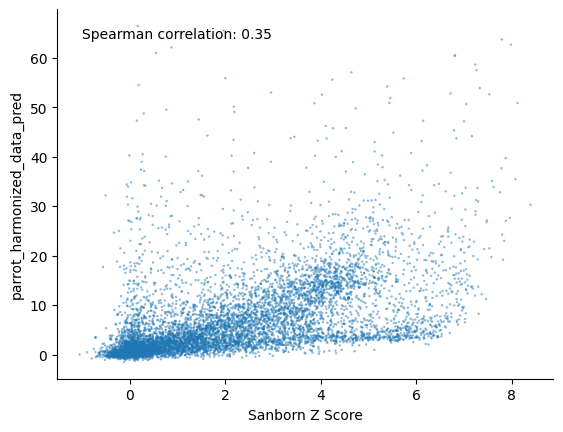

In [37]:
from scipy.stats import spearmanr

sns.scatterplot(data = all_sanborn, x = "Z score", y = "parrot_harmonized_data_pred", edgecolor = 'none', alpha = 0.5, s = 3)

corr, _ = spearmanr(all_sanborn.dropna()["Z score"], all_sanborn.dropna()["parrot_harmonized_data_pred"])
plt.text(0.05, 0.95, f"Spearman correlation: {corr:.2f}", transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

plt.xlabel("Sanborn Z Score")

sns.despine()

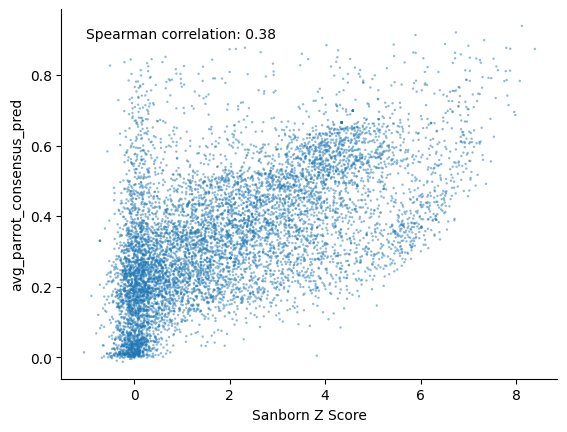

In [38]:
sns.scatterplot(data = all_sanborn, x = "Z score", y = "avg_parrot_consensus_pred", edgecolor = 'none', alpha = 0.5, s = 3)

corr, _ = spearmanr(all_sanborn.dropna()["Z score"], all_sanborn.dropna()["avg_parrot_consensus_pred"])
plt.text(0.05, 0.95, f"Spearman correlation: {corr:.2f}", transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

plt.xlabel("Sanborn Z Score")

sns.despine()

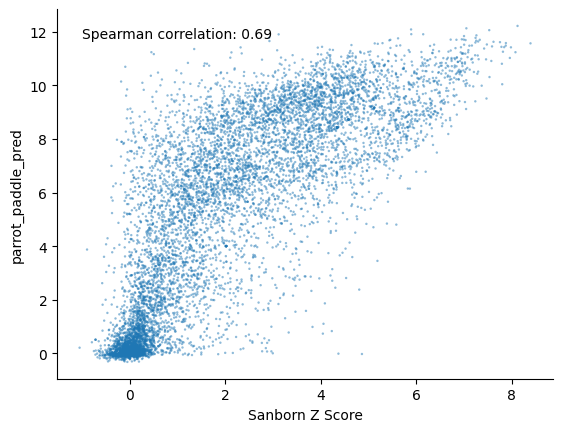

In [72]:
sns.scatterplot(data = all_sanborn, x = "Z score", y = "parrot_paddle_pred", edgecolor = 'none', alpha = 0.5, s = 3)

corr, _ = spearmanr(all_sanborn.dropna()["Z score"], all_sanborn.dropna()["parrot_paddle_pred"])
plt.text(0.05, 0.95, f"Spearman correlation: {corr:.2f}", transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

plt.xlabel("Sanborn Z Score")

sns.despine()

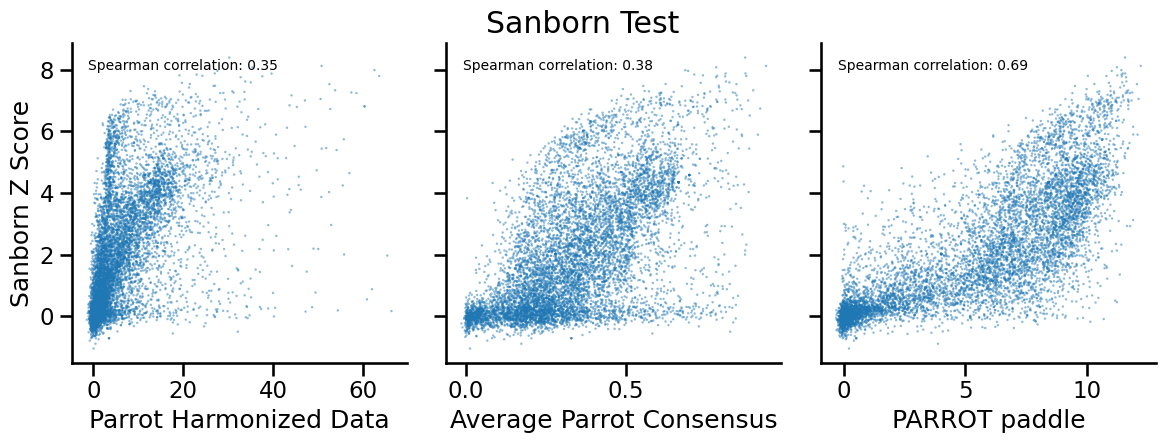

In [96]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5), sharey = True)

# First subplot
sns.scatterplot(data=all_sanborn, x="parrot_harmonized_data_pred", y="Z score", edgecolor='none', alpha=0.5, s=3, ax=axes[0])
corr, _ = spearmanr(all_sanborn.dropna()["parrot_harmonized_data_pred"], all_sanborn.dropna()["Z score"])
axes[0].text(0.05, 0.95, f"Spearman correlation: {corr:.2f}", transform=axes[0].transAxes, fontsize=10, verticalalignment='top')
axes[0].set_ylabel("Sanborn Z Score")
axes[0].set_xlabel("Parrot Harmonized Data")
# axes[0].axvline(5, color = 'red')
# axes[0].axhline(3.5, color = 'red')
sns.despine(ax=axes[0])

# Second subplot
sns.scatterplot(data=all_sanborn, x="avg_parrot_consensus_pred", y="Z score", edgecolor='none', alpha=0.5, s=3, ax=axes[1])
corr, _ = spearmanr(all_sanborn.dropna()["avg_parrot_consensus_pred"], all_sanborn.dropna()["Z score"])
axes[1].text(0.05, 0.95, f"Spearman correlation: {corr:.2f}", transform=axes[1].transAxes, fontsize=10, verticalalignment='top')
axes[1].set_ylabel("Sanborn Z Score")
axes[1].set_xlabel("Average Parrot Consensus")
# axes[1].axvline(0.4, color = 'red')
# axes[1].axhline(3.5, color = 'red')
sns.despine(ax=axes[1])

# Third subplot
sns.scatterplot(data=all_sanborn, x="parrot_paddle_pred", y="Z score", edgecolor='none', alpha=0.5, s=3, ax=axes[2])
corr, _ = spearmanr(all_sanborn.dropna()["parrot_paddle_pred"], all_sanborn.dropna()["Z score"])
axes[2].text(0.05, 0.95, f"Spearman correlation: {corr:.2f}", transform=axes[2].transAxes, fontsize=10, verticalalignment='top')
axes[2].set_ylabel("Sanborn Z Score")
axes[2].set_xlabel("PARROT paddle")
# axes[1].axvline(0.4, color = 'red')
# axes[1].axhline(3.5, color = 'red')
sns.despine(ax=axes[2])

plt.suptitle("Sanborn Test", y = 0.9)
plt.tight_layout()


In [79]:
sum(all_sanborn['is_positive']) / len(all_sanborn)

0.23614958448753462

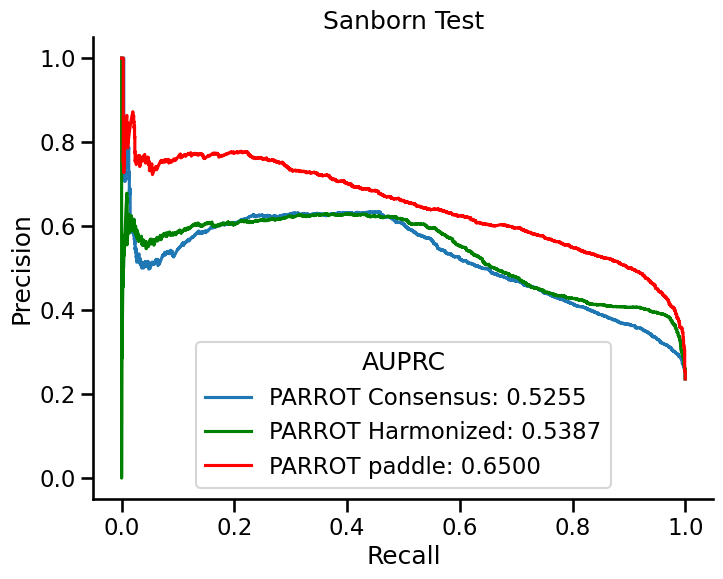

In [121]:
from sklearn.metrics import precision_recall_curve, average_precision_score

sns.set_context('talk')
# Define the positive class based on the condition
all_sanborn['is_positive'] = all_sanborn['Z score'] > 3.5

# Initialize the figure
plt.figure(figsize=(8, 6))

# Calculate precision, recall, and AUPRC for avg_parrot_consensus_pred
precision, recall, _ = precision_recall_curve(all_sanborn['is_positive'], all_sanborn['avg_parrot_consensus_pred'])
auprc = average_precision_score(all_sanborn['is_positive'], all_sanborn['avg_parrot_consensus_pred'])
plt.plot(recall, precision, label=f"PARROT Consensus: {auprc:.4f}")

# Calculate precision, recall, and AUPRC for parrot_harmonized_data_pred
precision, recall, _ = precision_recall_curve(all_sanborn['is_positive'], all_sanborn['parrot_harmonized_data_pred'])
auprc = average_precision_score(all_sanborn['is_positive'], all_sanborn['parrot_harmonized_data_pred'])
plt.plot(recall, precision, label=f"PARROT Harmonized: {auprc:.4f}", color='green')

# Calculate precision, recall, and AUPRC for parrot_paddle_pred
precision, recall, _ = precision_recall_curve(all_sanborn['is_positive'], all_sanborn['parrot_paddle_pred'])
auprc = average_precision_score(all_sanborn['is_positive'], all_sanborn['parrot_paddle_pred'])
plt.plot(recall, precision, label=f"PARROT paddle: {auprc:.4f}", color='red')

# Plot the precision-recall curve
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Sanborn Test")
plt.legend(title = "AUPRC")
sns.despine()

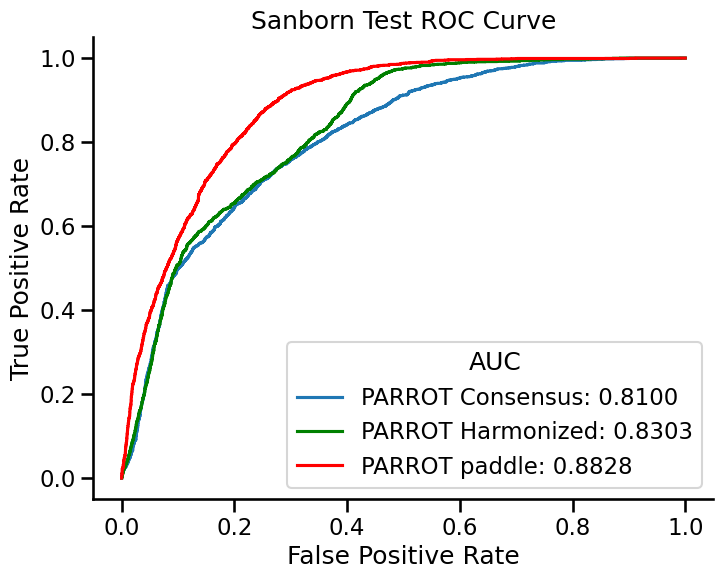

In [122]:
from sklearn.metrics import roc_curve, roc_auc_score

sns.set_context('talk')
# Define the positive class based on the condition
all_sanborn['is_positive'] = all_sanborn['Z score'] > 3.5

# Initialize the figure
plt.figure(figsize=(8, 6))

# Calculate ROC curve and AUC for avg_parrot_consensus_pred
fpr, tpr, _ = roc_curve(all_sanborn['is_positive'], all_sanborn['avg_parrot_consensus_pred'])
auc = roc_auc_score(all_sanborn['is_positive'], all_sanborn['avg_parrot_consensus_pred'])
plt.plot(fpr, tpr, label=f"PARROT Consensus: {auc:.4f}")

# Calculate ROC curve and AUC for parrot_harmonized_data_pred
fpr, tpr, _ = roc_curve(all_sanborn['is_positive'], all_sanborn['parrot_harmonized_data_pred'])
auc = roc_auc_score(all_sanborn['is_positive'], all_sanborn['parrot_harmonized_data_pred'])
plt.plot(fpr, tpr, label=f"PARROT Harmonized: {auc:.4f}", color='green')

# Calculate ROC curve and AUC for parrot_paddle_pred
fpr, tpr, _ = roc_curve(all_sanborn['is_positive'], all_sanborn['parrot_paddle_pred'])
auc = roc_auc_score(all_sanborn['is_positive'], all_sanborn['parrot_paddle_pred'])
plt.plot(fpr, tpr, label=f"PARROT paddle: {auc:.4f}", color='red')

# Plot the ROC curve
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Sanborn Test ROC Curve")
plt.legend(title="AUC")
sns.despine()

In [58]:
all_sanborn

,Unnamed: 0,protein sequence,protein,protein ID,position,activation,Z score,group,num cells,"num cells, bin 1",...,"num cells, bin 7","num cells, bin 8",GFP average,GFP std,nuclear confident,disorder fraction,parrot_pred,parrot_consensus_pred,parrot_harmonized_data_pred,avg_parrot_consensus_pred
0,D_ADbest-AA-muts_P07248_415_DE,SENQPEFVEFQELLENETLGNELLETTAVLKEFELLHEESVSATAT...,ADR1,P07248,415.0,16.930617,4.545554,ADbest-AA-muts,39.106510,0.000000,...,0.000000,0.000000,188.367987,1.952014,NaN,NaN,"[0.6141116, 0.6377285, 0.59335536, 0.5836047, ...","[0.6141116, 0.6377285, 0.59335536, 0.5836047, ...",9.209839,0.589143
1,D_ADbest-AA-muts_P07248_415_ED,SDNQPDFVDFQDLLDNDTLGNDLLDTTAVLKDFDLLHDDSVSATAT...,ADR1,P07248,415.0,57.468119,6.509113,ADbest-AA-muts,138.026904,0.000000,...,56.480461,13.586534,639.383311,2.009468,NaN,NaN,"[0.71410805, 0.75583106, 0.71530586, 0.7141337...","[0.71410805, 0.75583106, 0.71530586, 0.7141337...",22.822618,0.887520
2,D_ADbest-AA-muts_P07248_648_DE,LPHFPIIHPSLLELELESLQRYTNEEGYEEAENAQLFERLSQGTEK...,ADR1,P07248,648.0,8.771608,3.488982,ADbest-AA-muts,53.525191,0.000000,...,0.000000,0.000000,97.591841,1.969207,NaN,NaN,"[0.29672343, 0.29356375, 0.2943753, 0.3332867,...","[0.29672343, 0.29356375, 0.2943753, 0.3332867,...",1.003897,0.265799
3,D_ADbest-AA-muts_P07248_648_ED,LPHFPIIHPSLLDLDLDSLQRYTNDDGYDDADNAQLFDRLSQGTDK...,ADR1,P07248,648.0,18.596741,4.696363,ADbest-AA-muts,163.682464,0.000000,...,3.704986,0.000000,206.905080,2.367087,NaN,NaN,"[0.48007566, 0.48881313, 0.4757893, 0.51956713...","[0.48007566, 0.48881313, 0.4757893, 0.51956713...",4.181293,0.590665
4,D_ADbest-AA-muts_P07269_0_DE,MMEEFSYEHEFNTHFATELEYLQHEQQQQQQQQHEQQHNQQQQPQP...,PHO2,P07269,0.0,9.113962,3.550498,ADbest-AA-muts,57.209762,0.000000,...,0.000000,0.000000,101.400833,1.816528,NaN,NaN,"[0.4225715, 0.41646576, 0.45522875, 0.40836674...","[0.4225715, 0.41646576, 0.45522875, 0.40836674...",1.685246,0.233829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8659,D_nuc-nonhits_Q03656_575,LLGAPWGCGADIWSTACLIFELITGDFLFEPDEGHSYTKDDDHIAQ...,SKY1,Q03656,575.0,0.882813,-0.200263,nuc-nonhits,373.273630,15.279192,...,0.000000,0.000000,9.822066,1.698867,False,0.052411,"[0.5095609, 0.5375697, 0.5450611, 0.5736192, 0...","[0.5095609, 0.5375697, 0.5450611, 0.5736192, 0...",8.586390,0.552926
8660,D_nuc-nonhits_P17883_860,QVLRLFIWIESKVDTLPVESLVSIFENSQFSGSEEIDSVDNIKIDT...,SKI3,P17883,860.0,0.872411,-0.219305,nuc-nonhits,123.591920,10.744025,...,0.000000,0.000000,9.706344,1.807475,False,0.106918,"[0.094473474, 0.15301678, 0.17952222, 0.223656...","[0.094473474, 0.15301678, 0.17952222, 0.223656...",0.336440,0.265413
8661,D_nuc-nonhits_P53036_375,QRDPVYLGHLLYELTMHMEDFYALLIKLENDDDDDHDTASKALPSV...,SAP4,P53036,375.0,0.870095,-0.223576,nuc-nonhits,198.278393,6.640780,...,0.000000,0.000000,9.680576,1.792224,False,0.270440,"[0.23453888, 0.28230852, 0.36139542, 0.2873225...","[0.23453888, 0.28230852, 0.36139542, 0.2873225...",0.918645,0.220039
8662,D_nuc-nonhits_P22211_487,EYCIGTTLNHPNIIETIEIVYENDRILQVMEYCEYDLFAIVMSNKM...,NPR1,P22211,487.0,0.836971,-0.285937,nuc-nonhits,144.753817,12.741658,...,0.000000,0.000000,9.312039,1.798080,False,0.012579,"[0.24207762, 0.26287946, 0.2720001, 0.28873622...","[0.24207762, 0.26287946, 0.2720001, 0.28873622...",3.103232,0.347352


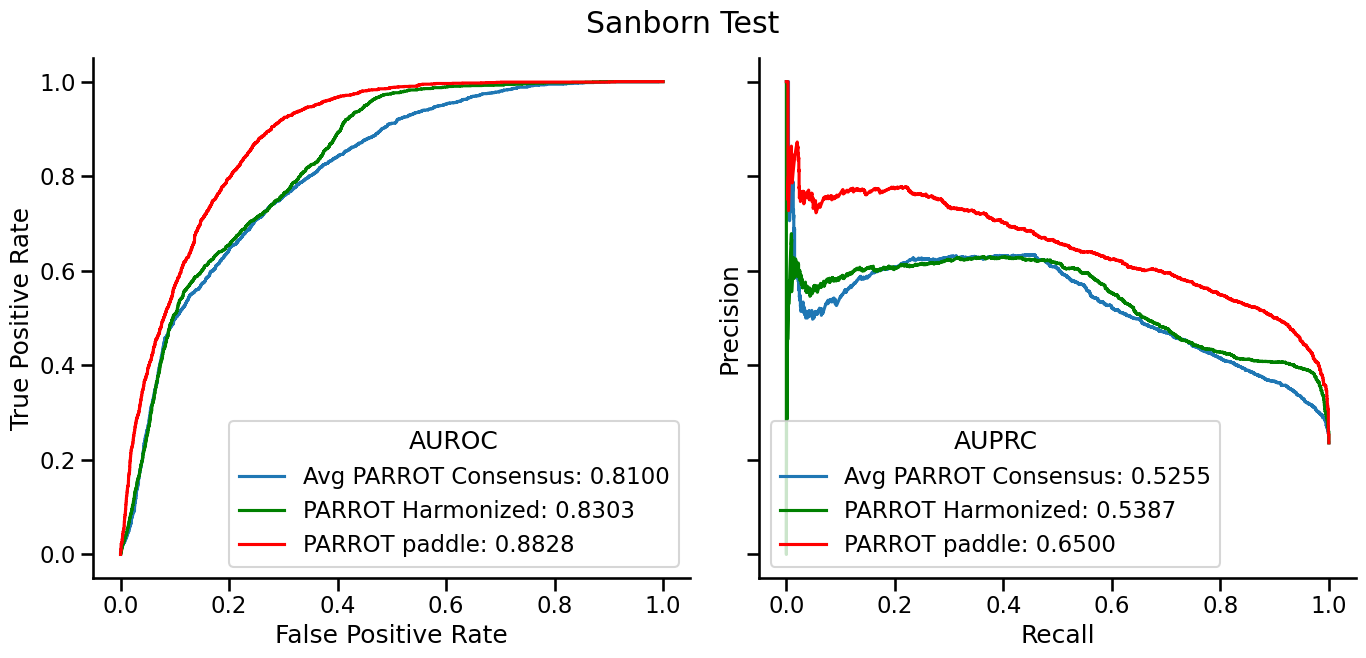

In [141]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7), sharey=True)

# ROC Curve
fpr, tpr, _ = roc_curve(all_sanborn['is_positive'], all_sanborn['avg_parrot_consensus_pred'])
auc = roc_auc_score(all_sanborn['is_positive'], all_sanborn['avg_parrot_consensus_pred'])
axes[0].plot(fpr, tpr, label=f"Avg PARROT Consensus: {auc:.4f}")
fpr, tpr, _ = roc_curve(all_sanborn['is_positive'], all_sanborn['parrot_harmonized_data_pred'])
auc = roc_auc_score(all_sanborn['is_positive'], all_sanborn['parrot_harmonized_data_pred'])
axes[0].plot(fpr, tpr, label=f"PARROT Harmonized: {auc:.4f}", color='green')
fpr, tpr, _ = roc_curve(all_sanborn['is_positive'], all_sanborn['parrot_paddle_pred'])
auc = roc_auc_score(all_sanborn['is_positive'], all_sanborn['parrot_paddle_pred'])
axes[0].plot(fpr, tpr, label=f"PARROT paddle: {auc:.4f}", color='red')
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].legend(title="AUROC", loc="lower right")
sns.despine(ax=axes[0])

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(all_sanborn['is_positive'], all_sanborn['avg_parrot_consensus_pred'])
auprc = average_precision_score(all_sanborn['is_positive'], all_sanborn['avg_parrot_consensus_pred'])
axes[1].plot(recall, precision, label=f"Avg PARROT Consensus: {auprc:.4f}")
precision, recall, _ = precision_recall_curve(all_sanborn['is_positive'], all_sanborn['parrot_harmonized_data_pred'])
auprc = average_precision_score(all_sanborn['is_positive'], all_sanborn['parrot_harmonized_data_pred'])
axes[1].plot(recall, precision, label=f"PARROT Harmonized: {auprc:.4f}", color='green')
precision, recall, _ = precision_recall_curve(all_sanborn['is_positive'], all_sanborn['parrot_paddle_pred'])
auprc = average_precision_score(all_sanborn['is_positive'], all_sanborn['parrot_paddle_pred'])
axes[1].plot(recall, precision, label=f"PARROT paddle: {auprc:.4f}", color='red')
axes[1].set_xlabel("Recall")
axes[1].set_ylabel("Precision")
axes[1].legend(title="AUPRC", loc="lower left")
sns.despine(ax=axes[1])

plt.suptitle("Sanborn Test", y = 0.95)
plt.tight_layout()


# 2. Using ARF data

In [97]:
arf_data = pd.read_excel("../data/arf_41586_2024_7707_MOESM4_ESM.xlsx")
arf_data

,ARF Clade,Clade A ARF Subclade,Species,Model,Start Position,Fragment Sequence,ScaleScore
0,Clade C,NaN,Amborella trichopododa,evm_27.TU.AmTr_v1.0_scaffold00148.24|evm_27.mo...,1,VVSTIPSVQLTAFSPAKKKLRLSPHLDFPIDSTFHPLSSN,0.132163
1,Clade C,NaN,Amborella trichopododa,evm_27.TU.AmTr_v1.0_scaffold00148.24|evm_27.mo...,11,TAFSPAKKKLRLSPHLDFPIDSTFHPLSSNIDPTFASLSS,0.698559
2,Clade C,NaN,Amborella trichopododa,evm_27.TU.AmTr_v1.0_scaffold00148.24|evm_27.mo...,21,RLSPHLDFPIDSTFHPLSSNIDPTFASLSSNLNPTPLTSS,1.002289
3,Clade C,NaN,Amborella trichopododa,evm_27.TU.AmTr_v1.0_scaffold00148.24|evm_27.mo...,31,DSTFHPLSSNIDPTFASLSSNLNPTPLTSSMPRPTNPFQG,0.216912
4,Clade C,NaN,Amborella trichopododa,evm_27.TU.AmTr_v1.0_scaffold00148.24|evm_27.mo...,41,IDPTFASLSSNLNPTPLTSSMPRPTNPFQGLPDYHVPAGI,-0.182901
...,...,...,...,...,...,...,...
9538,NaN,NaN,Arabidopsis thaliana,ARF7_AD2_DEtoA,1,GANNRQQNFLAPTFGLAGASRNSLLGGANVANGFVPATLL,-0.119703
9539,NaN,NaN,Arabidopsis thaliana,ARF19_AD1_minusswapplus,1,PPFFDPEYPDQPGMPRRKLRMKNAFEDAMPWMGKRFGMER,-0.348388
9540,NaN,NaN,Arabidopsis thaliana,ARF19_AD2_minusswapplus,1,SQLQQQSMLPTGAEMTHQNINSMGNEGLSQMTSFAQKMQF,-0.758803
9541,NaN,NaN,Arabidopsis thaliana,ARF7_AD1_minusswapplus,1,PPFFDPDFSGQPGMPRRKTRMKSALEDAMPWLRNSLKMER,-0.394609


In [99]:
arf_data["parrot_paddle_pred"] = arf_data["Fragment Sequence"].apply(lambda seq: parrot_paddle_predictor.predict(seq)[0])
arf_data["parrot_consensus_pred"] = arf_data["Fragment Sequence"].apply(lambda seq: np.mean(consensus_predictor.predict(seq)))
arf_data["parrot_harmonized_data_pred"] = arf_data["Fragment Sequence"].apply(lambda seq: slow_parrot_predictor.predict(seq)[0])
arf_data

,ARF Clade,Clade A ARF Subclade,Species,Model,Start Position,Fragment Sequence,ScaleScore,parrot_paddle_pred,parrot_consensus_pred,parrot_harmonized_data_pred
0,Clade C,NaN,Amborella trichopododa,evm_27.TU.AmTr_v1.0_scaffold00148.24|evm_27.mo...,1,VVSTIPSVQLTAFSPAKKKLRLSPHLDFPIDSTFHPLSSN,0.132163,0.483517,0.093230,1.701690
1,Clade C,NaN,Amborella trichopododa,evm_27.TU.AmTr_v1.0_scaffold00148.24|evm_27.mo...,11,TAFSPAKKKLRLSPHLDFPIDSTFHPLSSNIDPTFASLSS,0.698559,1.454274,0.195392,11.126929
2,Clade C,NaN,Amborella trichopododa,evm_27.TU.AmTr_v1.0_scaffold00148.24|evm_27.mo...,21,RLSPHLDFPIDSTFHPLSSNIDPTFASLSSNLNPTPLTSS,1.002289,3.089439,0.255455,18.888025
3,Clade C,NaN,Amborella trichopododa,evm_27.TU.AmTr_v1.0_scaffold00148.24|evm_27.mo...,31,DSTFHPLSSNIDPTFASLSSNLNPTPLTSSMPRPTNPFQG,0.216912,0.323779,0.089478,2.947559
4,Clade C,NaN,Amborella trichopododa,evm_27.TU.AmTr_v1.0_scaffold00148.24|evm_27.mo...,41,IDPTFASLSSNLNPTPLTSSMPRPTNPFQGLPDYHVPAGI,-0.182901,0.288601,0.069704,2.169575
...,...,...,...,...,...,...,...,...,...,...
9538,NaN,NaN,Arabidopsis thaliana,ARF7_AD2_DEtoA,1,GANNRQQNFLAPTFGLAGASRNSLLGGANVANGFVPATLL,-0.119703,-0.054271,0.031757,0.966324
9539,NaN,NaN,Arabidopsis thaliana,ARF19_AD1_minusswapplus,1,PPFFDPEYPDQPGMPRRKLRMKNAFEDAMPWMGKRFGMER,-0.348388,0.887910,0.112095,0.134572
9540,NaN,NaN,Arabidopsis thaliana,ARF19_AD2_minusswapplus,1,SQLQQQSMLPTGAEMTHQNINSMGNEGLSQMTSFAQKMQF,-0.758803,0.936159,0.030195,0.112599
9541,NaN,NaN,Arabidopsis thaliana,ARF7_AD1_minusswapplus,1,PPFFDPDFSGQPGMPRRKTRMKSALEDAMPWLRNSLKMER,-0.394609,0.817904,0.117302,0.291360


In [106]:
arf_data["max_parrot_consensus_pred"] = arf_data["Fragment Sequence"].apply(lambda seq: np.max(consensus_predictor.predict(seq)))
arf_data

,ARF Clade,Clade A ARF Subclade,Species,Model,Start Position,Fragment Sequence,ScaleScore,parrot_paddle_pred,parrot_consensus_pred,parrot_harmonized_data_pred,is_positive,max_parrot_consensus_pred
0,Clade C,NaN,Amborella trichopododa,evm_27.TU.AmTr_v1.0_scaffold00148.24|evm_27.mo...,1,VVSTIPSVQLTAFSPAKKKLRLSPHLDFPIDSTFHPLSSN,0.132163,0.483517,0.093230,1.701690,False,0.291939
1,Clade C,NaN,Amborella trichopododa,evm_27.TU.AmTr_v1.0_scaffold00148.24|evm_27.mo...,11,TAFSPAKKKLRLSPHLDFPIDSTFHPLSSNIDPTFASLSS,0.698559,1.454274,0.195392,11.126929,False,0.405325
2,Clade C,NaN,Amborella trichopododa,evm_27.TU.AmTr_v1.0_scaffold00148.24|evm_27.mo...,21,RLSPHLDFPIDSTFHPLSSNIDPTFASLSSNLNPTPLTSS,1.002289,3.089439,0.255455,18.888025,True,0.363996
3,Clade C,NaN,Amborella trichopododa,evm_27.TU.AmTr_v1.0_scaffold00148.24|evm_27.mo...,31,DSTFHPLSSNIDPTFASLSSNLNPTPLTSSMPRPTNPFQG,0.216912,0.323779,0.089478,2.947559,False,0.133312
4,Clade C,NaN,Amborella trichopododa,evm_27.TU.AmTr_v1.0_scaffold00148.24|evm_27.mo...,41,IDPTFASLSSNLNPTPLTSSMPRPTNPFQGLPDYHVPAGI,-0.182901,0.288601,0.069704,2.169575,False,0.096759
...,...,...,...,...,...,...,...,...,...,...,...,...
9538,NaN,NaN,Arabidopsis thaliana,ARF7_AD2_DEtoA,1,GANNRQQNFLAPTFGLAGASRNSLLGGANVANGFVPATLL,-0.119703,-0.054271,0.031757,0.966324,False,0.091799
9539,NaN,NaN,Arabidopsis thaliana,ARF19_AD1_minusswapplus,1,PPFFDPEYPDQPGMPRRKLRMKNAFEDAMPWMGKRFGMER,-0.348388,0.887910,0.112095,0.134572,False,0.263538
9540,NaN,NaN,Arabidopsis thaliana,ARF19_AD2_minusswapplus,1,SQLQQQSMLPTGAEMTHQNINSMGNEGLSQMTSFAQKMQF,-0.758803,0.936159,0.030195,0.112599,False,0.071290
9541,NaN,NaN,Arabidopsis thaliana,ARF7_AD1_minusswapplus,1,PPFFDPDFSGQPGMPRRKTRMKSALEDAMPWLRNSLKMER,-0.394609,0.817904,0.117302,0.291360,False,0.325279


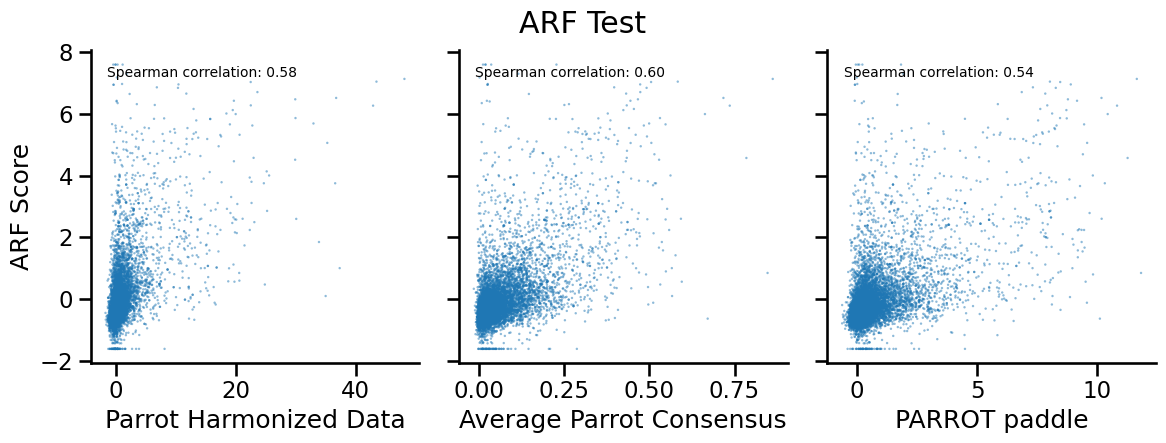

In [111]:
fig, axes = plt.subplots(1, 3, figsize=(12, 5), sharey = True)

# First subplot
sns.scatterplot(data=arf_data, x="parrot_harmonized_data_pred", y="ScaleScore", edgecolor='none', alpha=0.5, s=3, ax=axes[0])
corr, _ = spearmanr(arf_data.dropna()["parrot_harmonized_data_pred"], arf_data.dropna()["ScaleScore"])
axes[0].text(0.05, 0.95, f"Spearman correlation: {corr:.2f}", transform=axes[0].transAxes, fontsize=10, verticalalignment='top')
axes[0].set_ylabel("ARF Score")
axes[0].set_xlabel("Parrot Harmonized Data")
# axes[0].axvline(5, color = 'red')
# axes[0].axhline(3.5, color = 'red')
sns.despine(ax=axes[0])

# Second subplot
sns.scatterplot(data=arf_data, x="parrot_consensus_pred", y="ScaleScore", edgecolor='none', alpha=0.5, s=3, ax=axes[1])
corr, _ = spearmanr(arf_data.dropna()["parrot_consensus_pred"], arf_data.dropna()["ScaleScore"])
axes[1].text(0.05, 0.95, f"Spearman correlation: {corr:.2f}", transform=axes[1].transAxes, fontsize=10, verticalalignment='top')
axes[1].set_ylabel("ARF Score")
axes[1].set_xlabel("Average Parrot Consensus")
# axes[1].axvline(0.4, color = 'red')
# axes[1].axhline(3.5, color = 'red')
sns.despine(ax=axes[1])

# Third subplot
sns.scatterplot(data=arf_data, x="parrot_paddle_pred", y="ScaleScore", edgecolor='none', alpha=0.5, s=3, ax=axes[2])
corr, _ = spearmanr(arf_data.dropna()["parrot_paddle_pred"], arf_data.dropna()["ScaleScore"])
axes[2].text(0.05, 0.95, f"Spearman correlation: {corr:.2f}", transform=axes[2].transAxes, fontsize=10, verticalalignment='top')
axes[2].set_ylabel("ARF Score")
axes[2].set_xlabel("PARROT paddle")
# axes[1].axvline(0.4, color = 'red')
# axes[1].axhline(3.5, color = 'red')
sns.despine(ax=axes[2])

plt.suptitle("ARF Test", y = 0.9)
plt.tight_layout()


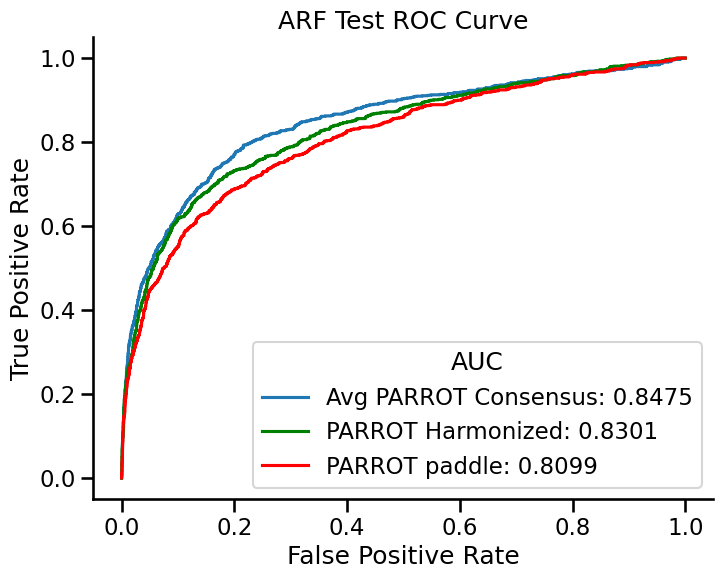

In [123]:
sns.set_context('talk')
# Define the positive class based on the condition
arf_data['is_positive'] = arf_data['ScaleScore'] > 1

# Initialize the figure
plt.figure(figsize=(8, 6))

# Calculate ROC curve and AUC for parrot_consensus_pred
fpr, tpr, _ = roc_curve(arf_data['is_positive'], arf_data['parrot_consensus_pred'])
auc = roc_auc_score(arf_data['is_positive'], arf_data['parrot_consensus_pred'])
plt.plot(fpr, tpr, label=f"Avg PARROT Consensus: {auc:.4f}")

# Calculate ROC curve and AUC for parrot_harmonized_data_pred
fpr, tpr, _ = roc_curve(arf_data['is_positive'], arf_data['parrot_harmonized_data_pred'])
auc = roc_auc_score(arf_data['is_positive'], arf_data['parrot_harmonized_data_pred'])
plt.plot(fpr, tpr, label=f"PARROT Harmonized: {auc:.4f}", color='green')

# Calculate ROC curve and AUC for parrot_paddle_pred
fpr, tpr, _ = roc_curve(arf_data['is_positive'], arf_data['parrot_paddle_pred'])
auc = roc_auc_score(arf_data['is_positive'], arf_data['parrot_paddle_pred'])
plt.plot(fpr, tpr, label=f"PARROT paddle: {auc:.4f}", color='red')

# Plot the ROC curve
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ARF Test ROC Curve")
plt.legend(title="AUC")
sns.despine()

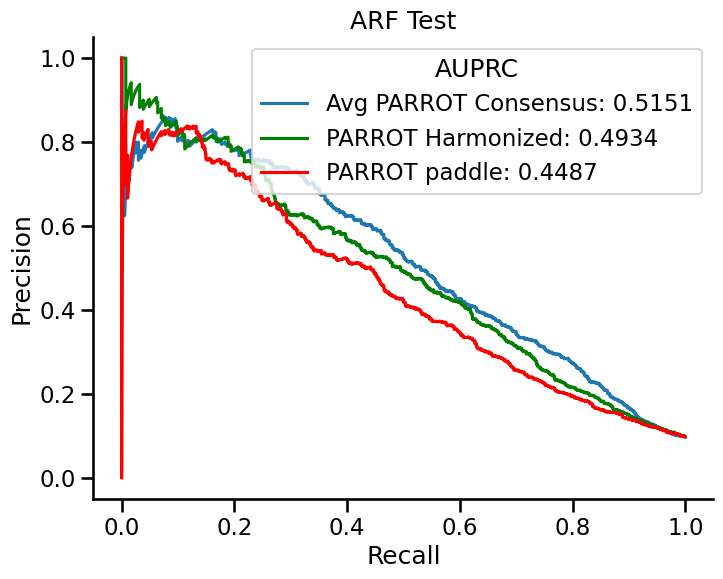

In [119]:

sns.set_context('talk')
# Define the positive class based on the condition
arf_data['is_positive'] = arf_data['ScaleScore'] > 1

# Initialize the figure
plt.figure(figsize=(8, 6))

# Calculate precision, recall, and AUPRC for parrot_consensus_pred
precision, recall, _ = precision_recall_curve(arf_data['is_positive'], arf_data['parrot_consensus_pred'])
auprc = average_precision_score(arf_data['is_positive'], arf_data['parrot_consensus_pred'])
plt.plot(recall, precision, label=f"Avg PARROT Consensus: {auprc:.4f}")

# Calculate precision, recall, and AUPRC for parrot_harmonized_data_pred
precision, recall, _ = precision_recall_curve(arf_data['is_positive'], arf_data['parrot_harmonized_data_pred'])
auprc = average_precision_score(arf_data['is_positive'], arf_data['parrot_harmonized_data_pred'])
plt.plot(recall, precision, label=f"PARROT Harmonized: {auprc:.4f}", color='green')

# Calculate precision, recall, and AUPRC for parrot_paddle_pred
precision, recall, _ = precision_recall_curve(arf_data['is_positive'], arf_data['parrot_paddle_pred'])
auprc = average_precision_score(arf_data['is_positive'], arf_data['parrot_paddle_pred'])
plt.plot(recall, precision, label=f"PARROT paddle: {auprc:.4f}", color='red')

# Plot the precision-recall curve
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("ARF Test")
plt.legend(title = "AUPRC")
sns.despine()

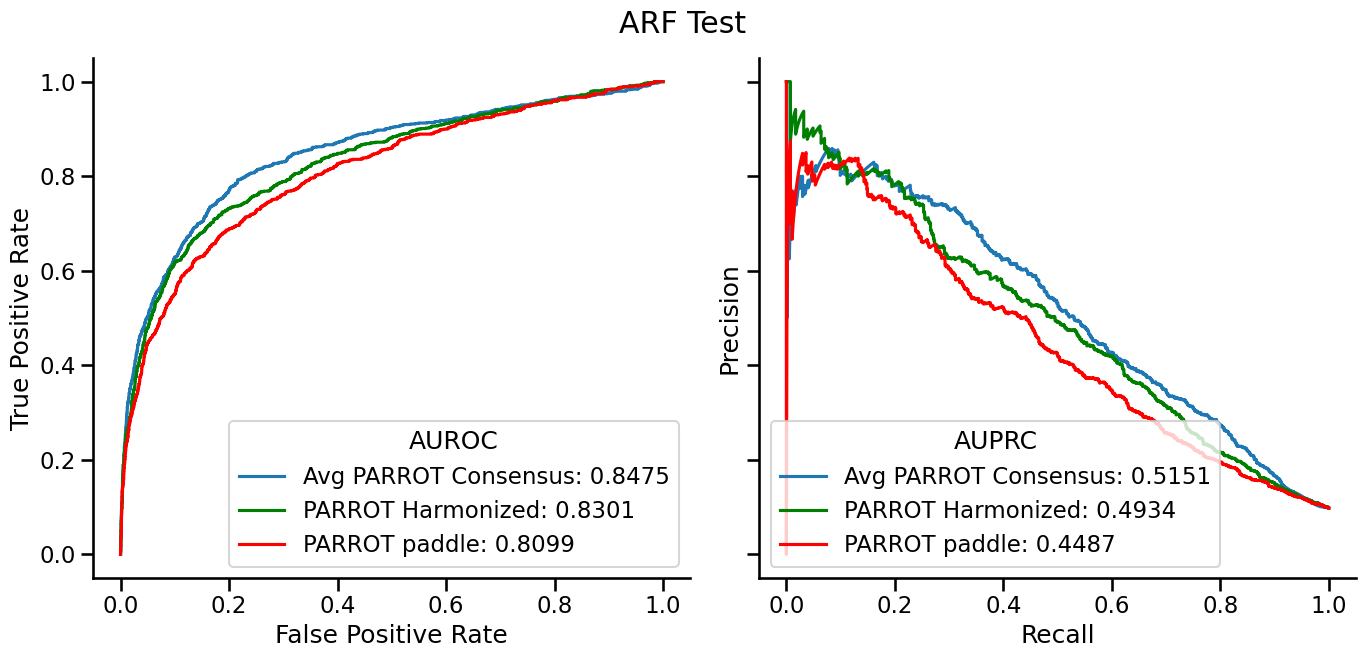

In [139]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7), sharey=True)

# ROC Curve
fpr, tpr, _ = roc_curve(arf_data['is_positive'], arf_data['parrot_consensus_pred'])
auc = roc_auc_score(arf_data['is_positive'], arf_data['parrot_consensus_pred'])
axes[0].plot(fpr, tpr, label=f"Avg PARROT Consensus: {auc:.4f}")
fpr, tpr, _ = roc_curve(arf_data['is_positive'], arf_data['parrot_harmonized_data_pred'])
auc = roc_auc_score(arf_data['is_positive'], arf_data['parrot_harmonized_data_pred'])
axes[0].plot(fpr, tpr, label=f"PARROT Harmonized: {auc:.4f}", color='green')
fpr, tpr, _ = roc_curve(arf_data['is_positive'], arf_data['parrot_paddle_pred'])
auc = roc_auc_score(arf_data['is_positive'], arf_data['parrot_paddle_pred'])
axes[0].plot(fpr, tpr, label=f"PARROT paddle: {auc:.4f}", color='red')
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].legend(title="AUROC", loc="lower right")
sns.despine(ax=axes[0])

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(arf_data['is_positive'], arf_data['parrot_consensus_pred'])
auprc = average_precision_score(arf_data['is_positive'], arf_data['parrot_consensus_pred'])
axes[1].plot(recall, precision, label=f"Avg PARROT Consensus: {auprc:.4f}")
precision, recall, _ = precision_recall_curve(arf_data['is_positive'], arf_data['parrot_harmonized_data_pred'])
auprc = average_precision_score(arf_data['is_positive'], arf_data['parrot_harmonized_data_pred'])
axes[1].plot(recall, precision, label=f"PARROT Harmonized: {auprc:.4f}", color='green')
precision, recall, _ = precision_recall_curve(arf_data['is_positive'], arf_data['parrot_paddle_pred'])
auprc = average_precision_score(arf_data['is_positive'], arf_data['parrot_paddle_pred'])
axes[1].plot(recall, precision, label=f"PARROT paddle: {auprc:.4f}", color='red')
axes[1].set_xlabel("Recall")
axes[1].set_ylabel("Precision")
axes[1].legend(title="AUPRC", loc="lower left")
sns.despine(ax=axes[1])

plt.suptitle("ARF Test", y = 0.95)
plt.tight_layout()
